In [3]:
import os
import pathlib
from matplotlib import animation

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import scipy.io as sio
from matplotlib import pyplot 
from tensorflow.keras import layers
from keras.models import load_model
from tensorflow.keras import models
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import time
from scipy import stats
from keras.utils import to_categorical   

# model training

In [16]:
train_data=sio.loadmat('./Dataset/MNIST_database_train.mat') 
image_train=train_data['images']
label_train=train_data['labels']
x_train, x_validate, y_train, y_validate = train_test_split(image_train,label_train, test_size = 0.20,shuffle=False)

In [17]:
x_train.shape

(48000, 784)

In [19]:
# modified to downsize
x_train = tf.image.resize(x_train.reshape(-1, 28, 28,1), [7,7], method='nearest').numpy().reshape(-1, 49)
x_validate = tf.image.resize(x_validate.reshape(-1, 28, 28,1), [7,7], method='nearest').numpy().reshape(-1, 49)

y_train=to_categorical(y_train, num_classes=10)
y_validate=to_categorical(y_validate, num_classes=10)

In [20]:
print(f"update x_train shape is {x_train.shape}")
print(f"update y_train shape is {y_train.shape}")

update x_train shape is (48000, 49)
update y_train shape is (48000, 10)


In [21]:
model = tf.keras.Sequential()
model.add(layers.Dense(10, activation='softmax',input_shape=(49,)))  
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500 (1.95 KB)

 Trainable params: 500 (1.95 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy ())

EPOCHS =1000
callbacks = [EarlyStopping(monitor='val_loss', patience=8), ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)]# uses validation set to stop training when it start overfitting
history = model.fit(x_train,y_train,validation_data=(x_validate,y_validate),callbacks=callbacks,epochs=EPOCHS,batch_size=32, verbose=2, shuffle=True)

Epoch 1/1000


2024-04-30 09:15:51.466969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1500/1500 - 11s - 8ms/step - loss: 1.9072 - val_loss: 1.6002
Epoch 2/1000
1500/1500 - 9s - 6ms/step - loss: 1.4593 - val_loss: 1.3083
Epoch 3/1000
1500/1500 - 9s - 6ms/step - loss: 1.2582 - val_loss: 1.1609
Epoch 4/1000
1500/1500 - 9s - 6ms/step - loss: 1.1488 - val_loss: 1.0738
Epoch 5/1000
1500/1500 - 9s - 6ms/step - loss: 1.0806 - val_loss: 1.0165
Epoch 6/1000
1500/1500 - 9s - 6ms/step - loss: 1.0342 - val_loss: 0.9759
Epoch 7/1000
1500/1500 - 9s - 6ms/step - loss: 1.0004 - val_loss: 0.9457
Epoch 8/1000
1500/1500 - 9s - 6ms/step - loss: 0.9746 - val_loss: 0.9224
Epoch 9/1000
1500/1500 - 9s - 6ms/step - loss: 0.9544 - val_loss: 0.9037
Epoch 10/1000
1500/1500 - 9s - 6ms/step - loss: 0.9380 - val_loss: 0.8884
Epoch 11/1000
1500/1500 - 9s - 6ms/step - loss: 0.9244 - val_loss: 0.8759
Epoch 12/1000
1500/1500 - 9s - 6ms/step - loss: 0.9130 - val_loss: 0.8655
Epoch 13/1000
1500/1500 - 9s - 6ms/step - loss: 0.9033 - val_loss: 0.8558
Epoch 14/1000
1500/1500 - 9s - 6ms/step - loss: 0.8949 - va

Epoch 112/1000
1500/1500 - 9s - 6ms/step - loss: 0.7905 - val_loss: 0.7466
Epoch 113/1000
1500/1500 - 9s - 6ms/step - loss: 0.7903 - val_loss: 0.7464
Epoch 114/1000
1500/1500 - 9s - 6ms/step - loss: 0.7902 - val_loss: 0.7464
Epoch 115/1000
1500/1500 - 9s - 6ms/step - loss: 0.7900 - val_loss: 0.7462
Epoch 116/1000
1500/1500 - 9s - 6ms/step - loss: 0.7898 - val_loss: 0.7461
Epoch 117/1000
1500/1500 - 9s - 6ms/step - loss: 0.7897 - val_loss: 0.7458
Epoch 118/1000
1500/1500 - 9s - 6ms/step - loss: 0.7895 - val_loss: 0.7456
Epoch 119/1000
1500/1500 - 9s - 6ms/step - loss: 0.7893 - val_loss: 0.7455
Epoch 120/1000
1500/1500 - 9s - 6ms/step - loss: 0.7892 - val_loss: 0.7456
Epoch 121/1000
1500/1500 - 9s - 6ms/step - loss: 0.7891 - val_loss: 0.7453
Epoch 122/1000
1500/1500 - 9s - 6ms/step - loss: 0.7889 - val_loss: 0.7452
Epoch 123/1000
1500/1500 - 9s - 6ms/step - loss: 0.7888 - val_loss: 0.7449
Epoch 124/1000
1500/1500 - 9s - 6ms/step - loss: 0.7886 - val_loss: 0.7448
Epoch 125/1000
1500/1500 

1500/1500 - 10s - 7ms/step - loss: 0.7802 - val_loss: 0.7367
Epoch 222/1000
1500/1500 - 10s - 7ms/step - loss: 0.7802 - val_loss: 0.7368
Epoch 223/1000
1500/1500 - 10s - 7ms/step - loss: 0.7801 - val_loss: 0.7365
Epoch 224/1000
1500/1500 - 9s - 6ms/step - loss: 0.7800 - val_loss: 0.7365
Epoch 225/1000
1500/1500 - 9s - 6ms/step - loss: 0.7800 - val_loss: 0.7366
Epoch 226/1000
1500/1500 - 9s - 6ms/step - loss: 0.7800 - val_loss: 0.7365
Epoch 227/1000
1500/1500 - 9s - 6ms/step - loss: 0.7799 - val_loss: 0.7363
Epoch 228/1000
1500/1500 - 9s - 6ms/step - loss: 0.7799 - val_loss: 0.7364
Epoch 229/1000
1500/1500 - 9s - 6ms/step - loss: 0.7798 - val_loss: 0.7362
Epoch 230/1000
1500/1500 - 9s - 6ms/step - loss: 0.7798 - val_loss: 0.7363
Epoch 231/1000
1500/1500 - 9s - 6ms/step - loss: 0.7797 - val_loss: 0.7363
Epoch 232/1000
1500/1500 - 10s - 6ms/step - loss: 0.7797 - val_loss: 0.7361
Epoch 233/1000
1500/1500 - 10s - 6ms/step - loss: 0.7796 - val_loss: 0.7361
Epoch 234/1000
1500/1500 - 9s - 6ms

Epoch 331/1000
1500/1500 - 9s - 6ms/step - loss: 0.7760 - val_loss: 0.7328
Epoch 332/1000
1500/1500 - 9s - 6ms/step - loss: 0.7760 - val_loss: 0.7327
Epoch 333/1000
1500/1500 - 9s - 6ms/step - loss: 0.7759 - val_loss: 0.7329
Epoch 334/1000
1500/1500 - 9s - 6ms/step - loss: 0.7759 - val_loss: 0.7328
Epoch 335/1000
1500/1500 - 9s - 6ms/step - loss: 0.7759 - val_loss: 0.7326
Epoch 336/1000
1500/1500 - 9s - 6ms/step - loss: 0.7759 - val_loss: 0.7326
Epoch 337/1000
1500/1500 - 9s - 6ms/step - loss: 0.7759 - val_loss: 0.7326
Epoch 338/1000
1500/1500 - 9s - 6ms/step - loss: 0.7758 - val_loss: 0.7326
Epoch 339/1000
1500/1500 - 9s - 6ms/step - loss: 0.7758 - val_loss: 0.7326
Epoch 340/1000
1500/1500 - 9s - 6ms/step - loss: 0.7758 - val_loss: 0.7326
Epoch 341/1000
1500/1500 - 9s - 6ms/step - loss: 0.7757 - val_loss: 0.7327
Epoch 342/1000
1500/1500 - 9s - 6ms/step - loss: 0.7757 - val_loss: 0.7323
Epoch 343/1000
1500/1500 - 9s - 6ms/step - loss: 0.7757 - val_loss: 0.7324
Epoch 344/1000
1500/1500 

1500/1500 - 9s - 6ms/step - loss: 0.7736 - val_loss: 0.7305
Epoch 441/1000
1500/1500 - 9s - 6ms/step - loss: 0.7736 - val_loss: 0.7305
Epoch 442/1000
1500/1500 - 9s - 6ms/step - loss: 0.7736 - val_loss: 0.7305
Epoch 443/1000
1500/1500 - 9s - 6ms/step - loss: 0.7736 - val_loss: 0.7305
Epoch 444/1000
1500/1500 - 9s - 6ms/step - loss: 0.7735 - val_loss: 0.7306
Epoch 445/1000
1500/1500 - 9s - 6ms/step - loss: 0.7735 - val_loss: 0.7304
Epoch 446/1000
1500/1500 - 9s - 6ms/step - loss: 0.7735 - val_loss: 0.7307
Epoch 447/1000
1500/1500 - 9s - 6ms/step - loss: 0.7735 - val_loss: 0.7305
Epoch 448/1000
1500/1500 - 9s - 6ms/step - loss: 0.7735 - val_loss: 0.7304
Epoch 449/1000
1500/1500 - 9s - 6ms/step - loss: 0.7735 - val_loss: 0.7304
Epoch 450/1000
1500/1500 - 9s - 6ms/step - loss: 0.7734 - val_loss: 0.7304
Epoch 451/1000
1500/1500 - 9s - 6ms/step - loss: 0.7734 - val_loss: 0.7303
Epoch 452/1000
1500/1500 - 9s - 6ms/step - loss: 0.7734 - val_loss: 0.7304
Epoch 453/1000
1500/1500 - 9s - 6ms/step

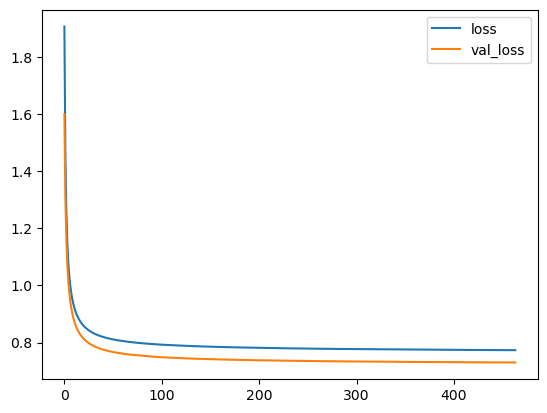

In [23]:
model=keras.models.load_model('best_model.keras')
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [30]:
test_data=sio.loadmat('./Dataset/MNIST_database_test.mat') 
image_test=test_data['images']
# modified to downsize
image_test = tf.image.resize(image_test.reshape(-1, 28, 28,1), [7,7], method='nearest').numpy().reshape(-1, 49)

label_test=np.reshape(test_data['labels'],[-1,])
label_test=to_categorical(label_test, num_classes=10)
# accuracy
model.evaluate(image_test,tmp_label_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8197


0.736016571521759

In [31]:
Layer1_weights=model.get_weights()[0]
Layer1_bias=model.get_weights()[1]

In [32]:
print(Layer1_weights.shape)
print(Layer1_bias.shape)

(49, 10)
(10,)


In [33]:
Model_para_inputs = {"Layer1_weights":Layer1_weights,"Layer1_bias":Layer1_bias,"image_test":image_test,"label_test":label_test,"label_predict":label_predict}
sio.savemat('Model_para_inputs.mat',Model_para_inputs)

# Quantization

In [34]:
def real_to_binary(weights,Q=2,R=1):
    d1=weights
    dim_array=d1.ndim
    if dim_array>1:
        [row_size,column_size]=d1.shape
    else:
        row_size=d1.shape
        d1=d1.reshape([row_size[0],1])
        [row_size,column_size]=d1.shape
    Q1=[["0"]]
    for j_loop in range(0,row_size-1):
        Q1.append(["0"])
    for j_loop in range(0,row_size):
        for i_loop in range(0,column_size-1):
                Q1[j_loop].append("0")
    integ_d1=np.floor(abs(d1))
    fract_d1=abs(d1)-integ_d1
    for j_loop in range(0,row_size):
        for i_loop in range(0,column_size):
            if d1[j_loop,i_loop]<0:
                Q1[j_loop][i_loop]='1'
            if d1[j_loop,i_loop]<=(2**R-1):
                Q1[j_loop][i_loop]+=np.binary_repr(int(integ_d1[j_loop,i_loop]),width=R)
                Q1[j_loop][i_loop]+=np.binary_repr(int(fract_d1[j_loop,i_loop]*2**Q),width=Q)
            else:
                Q1[j_loop][i_loop]+=np.binary_repr(int((2**R)-1),width=R)
                Q1[j_loop][i_loop]+=np.binary_repr(int((2**Q)-1),width=Q)              
    return Q1
            
                


def binary_to_real(weights_bin,Q=2,R=1):
    Q1=weights_bin
    row_size=len(Q1)
    column_size=len(Q1[0])
    if column_size>1:
        d1=np.zeros([row_size,column_size])
    else:
        d1=np.zeros([row_size,1])
    for j_loop in range(0,row_size):
        for i_loop in range(0,column_size):
            if Q1[j_loop][i_loop][0]=="0":
                sign_bit=1
            else:
                sign_bit=-1
            decimal_value=0    
            for decimcal_loop in range(Q+R,0,-1):
               if Q1[j_loop][i_loop][(Q+R)-decimcal_loop+1]=='1':
                   decimal_value=decimal_value+2**(decimcal_loop-Q-1)
               else:
                   decimal_value=decimal_value+0       
            d1[j_loop,i_loop]=sign_bit*decimal_value
    if column_size==1:
        d1=d1.reshape([row_size])        
    return d1

    
def real_to_decimal(weights,Q=2,R=1):
    d1=weights
    dim_array=d1.ndim
    if dim_array==1:
        row_size=d1.shape
        d1=d1.reshape([row_size[0],1])
    [row_size,column_size]=d1.shape
    decimal=np.zeros([row_size,column_size])
    Q1=[['0' for i in range(column_size)] for j in range(row_size)]
    integ_d1=np.floor(abs(d1))
    fract_d1=abs(d1)-integ_d1
    for j_loop in range(0,row_size):
        for i_loop in range(0,column_size):
            if d1[j_loop,i_loop]<0:
                Q1[j_loop][i_loop]='1'
            if d1[j_loop,i_loop]<=(2**R-1):
                Q1[j_loop][i_loop]+=np.binary_repr(int(integ_d1[j_loop,i_loop]),width=R)
                Q1[j_loop][i_loop]+=np.binary_repr(int(fract_d1[j_loop,i_loop]*2**Q),width=Q)
            else:
                Q1[j_loop][i_loop]+=np.binary_repr(int((2**R)-1),width=R)
                Q1[j_loop][i_loop]+=np.binary_repr(int((2**Q)-1),width=Q) 
            decimal[j_loop,i_loop]=int(Q1[j_loop][i_loop],base=2)                  
    return decimal

def decimal_to_real(weights_bin,Q=2,R=1):
    #make sure weights_bin has 2 dimn with the second dim as 1. 
    row_size,column_size=weights_bin.shape
    Q1=[]
    for i_loop in range(0,row_size):
            Q1.append(np.binary_repr(weights_bin[i_loop,0],width=Q+R+1))
    d1=np.zeros([row_size,1])
    for j_loop in range(0,row_size):
        if Q1[j_loop][0]=="0":
            sign_bit=1
        else:
            sign_bit=-1
        decimal_value=0    
        for decimcal_loop in range(Q+R,0,-1):
           if Q1[j_loop][(Q+R)-decimcal_loop+1]=='1':
               decimal_value=decimal_value+2**(decimcal_loop-Q-1)
           else:
               decimal_value=decimal_value+0       
        d1[j_loop,0]=sign_bit*decimal_value      
    return d1

In [35]:
Model_para_inputs=sio.loadmat('Model_para_inputs.mat')
Layer1_weights=Model_para_inputs['Layer1_weights']
Layer1_bias=Model_para_inputs['Layer1_bias']

In [36]:
#For the demonstrating the use I am only quantizing weights and biases from only the first neuron

input_test=Model_para_inputs['image_test']
input_test_decimal=np.reshape(real_to_decimal(binary_to_real(real_to_binary(np.concatenate([input_test[0,:],np.array([1.0])])))),[-1])
#Note there is a 1 added at the end of the input to enable multiplication of the bias with an input of 1. 
input_file = open("inputs.txt", "w")
a=np.where(input_test_decimal!=0)
input_non_zero=input_test_decimal[a]
np.savetxt(input_file, input_non_zero,newline='\n',fmt='%d')

input_file.close()

/var/folders/b_/jdvks4w5307150c7gr8jtgmc0000gn/T/ipykernel_73684/3033118337.py:23: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  Q1[j_loop][i_loop]+=np.binary_repr(int(integ_d1[j_loop,i_loop]),width=R)


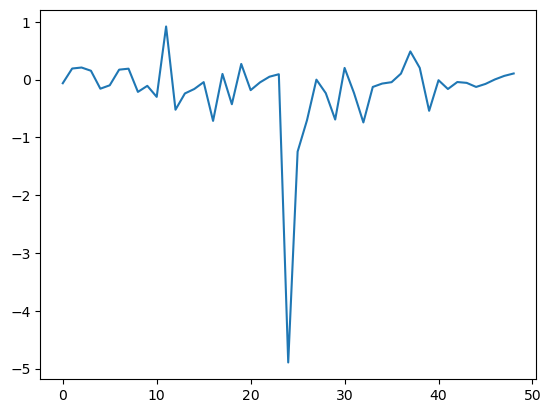

In [37]:
Neuron1_weights=Layer1_weights[:,0]

Neuron1_weights_quant=binary_to_real(real_to_binary(Neuron1_weights))

#checking the quantization error
Quantization_error=Neuron1_weights - Neuron1_weights_quant
pyplot.plot(Quantization_error)



Neuron1_bias=Layer1_bias[0]

Neuron1_bias_quant_decimal=real_to_decimal(binary_to_real(real_to_binary(Neuron1_bias)))


Neuron1_weights_quant_decimal=real_to_decimal(Neuron1_weights_quant)
Neuron1_bias_quant_decimal=Neuron1_bias_quant_decimal[0]

parameters=np.concatenate([np.reshape(Neuron1_weights_quant_decimal,[-1]),Neuron1_bias_quant_decimal])


parameters_nonzero=parameters[a]
weights_file = open("weights.txt", "w")
np.savetxt(weights_file, parameters_nonzero,newline='\n',fmt='%d')

weights_file.close()